In [26]:
import math

c:\Users\Forwa\Documents\Code\Practical Machine Learning\.venv\Lib\site-packages\magpylib\_src\obj_classes\class_current_Circle.py:131: MagpylibDeprecationWarning: Loop is deprecated  and will be removed in a future version, use Circle instead.
  _deprecation_warn()
c:\Users\Forwa\Documents\Code\Practical Machine Learning\.venv\Lib\site-packages\magpylib\_src\obj_classes\class_current_Circle.py:127: MagpylibDeprecationWarning: Loop is deprecated  and will be removed in a future version, use Circle instead.
  _deprecation_warn()


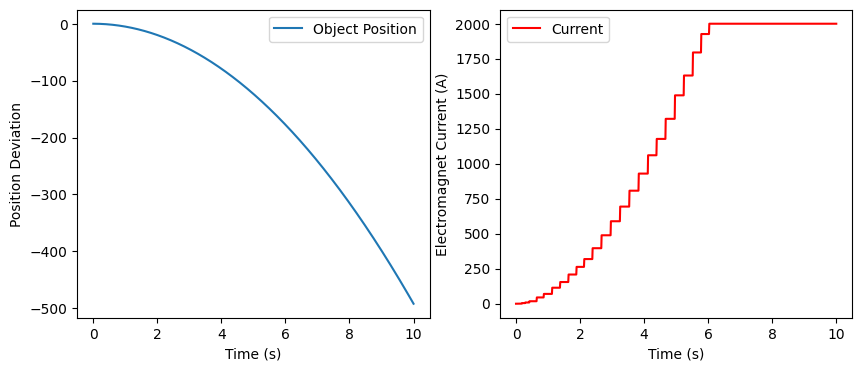

In [27]:
import math
import magpylib as magpy
import numpy as np
from simple_pid import PID
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# PID controller to regulate the current in the electromagnet
pid = PID(10.0, 0.5, 0.2, setpoint=0)  # Stronger Kp for faster correction
pid.output_limits = (-2000, 2000)  # Increased current range to allow stronger correction

# Simulation setup
time_steps = np.linspace(0, 10, 1000)  # Simulating 10 seconds
dt = time_steps[1] - time_steps[0]  # Time step for simulation
object_positions = []
current_values = []

# Initial object conditions
object_position = 0.05  # Deviation from setpoint
object_velocity = 0.0  # Initial velocity
mass = 0.5 # Object mass

import magpylib as magpy
import matplotlib.pyplot as plt



def get_magnetic_field_at_object(current, object_position):
    coil = magpy.current.Loop(current=current, diameter=0.1, position=(0,0,0))
    return coil.getB([0, 0, object_position])[2]  # Get Bz component

# Compute force based on field gradient
def compute_force(current, object_position, delta_x=1e-3):
    B1 = get_magnetic_field_at_object(current, object_position)
    B2 = get_magnetic_field_at_object(current, object_position + delta_x)
    dB2_dx = (B2**2 - B1**2) / delta_x  # Approximate gradient of B^2
    force = -dB2_dx  # Flip sign to ensure force is opposing gravity
    return force * 50  # Scale force to strongly counteract gravity

# Compute net force on the object including gravity
def net_force(current, object_position, mass, gravity=9.81, delta_x=1e-3):
    magnetic_force = compute_force(current, object_position, delta_x)
    gravitational_force = -mass * gravity  # Gravity pulls downward
    return magnetic_force + gravitational_force  # Net force as sum of both

# Simulate PID-controlled electromagnet
for t in time_steps:
    error = object_position - pid.setpoint
    current = pid(error)  # Adjust current based on PID
    force = net_force(current, object_position, mass)  # Compute net force
    acceleration = force / mass  # Newton's second law: F = ma
    object_velocity += acceleration * dt  # Update velocity
    object_position += object_velocity * dt  # Update position
    
    object_positions.append(object_position)
    current_values.append(current)

# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(time_steps, object_positions, label='Object Position')
plt.xlabel('Time (s)')
plt.ylabel('Position Deviation')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time_steps, current_values, label='Current', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Electromagnet Current (A)')
plt.legend()

plt.show()


-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
-2.50000262149988
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
24.743120387687064
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.81112880460117
86.811128

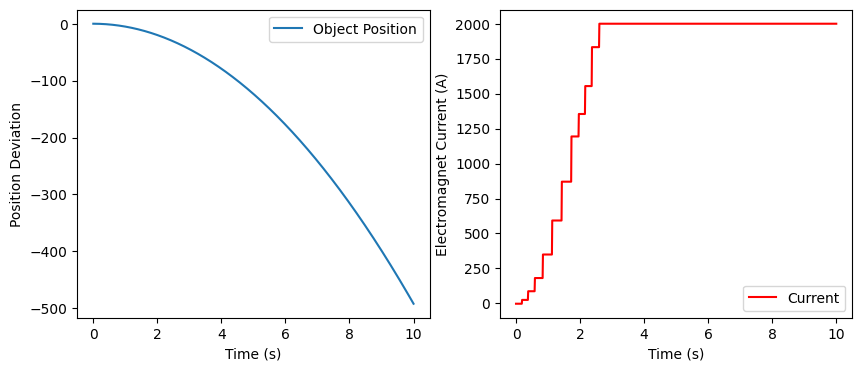

In [ ]:
import math
import magpylib as magpy
import numpy as np
from simple_pid import PID
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Adjusted PID controller (Higher Kp, lower Ki, higher Kd)
pid = PID(50.0, 0.1, 1.0, setpoint=0)  # More aggressive Kp, lower Ki
pid.output_limits = (-2000, 2000)  # Allow for stronger correction

# Simulation setup
time_steps = np.linspace(0, 10, 1000)  # Simulating 10 seconds
dt = time_steps[1] - time_steps[0]  # Time step for simulation
object_positions = []
current_values = []

# Initial object conditions
object_position = 0.05  # Deviation from setpoint
object_velocity = 0.0  # Initial velocity
mass = 0.5  # Object mass

# Provide an initial current boost
initial_current = 1000  # Adjust as needed
pid.set_auto_mode(True, last_output=initial_current)

def get_magnetic_field_at_object(current, object_position):
    coil = magpy.current.Loop(current=current, diameter=0.1, position=(0,0,0))
    return coil.getB([0, 0, object_position])[2]  # Get Bz component

# Compute force based on field gradient
def compute_force(current, object_position, delta_x=1e-3):
    B1 = get_magnetic_field_at_object(current, object_position)
    B2 = get_magnetic_field_at_object(current, object_position + delta_x)
    dB2_dx = (B2**2 - B1**2) / delta_x  # Approximate gradient of B^2
    force = -dB2_dx  # Flip sign to ensure force is opposing gravity
    return force * 50  # Scale force to strongly counteract gravity

# Compute net force on the object including gravity
def net_force(current, object_position, mass, gravity=9.81, delta_x=1e-3):
    magnetic_force = compute_force(current, object_position, delta_x)
    gravitational_force = -mass * gravity  # Gravity pulls downward
    return magnetic_force + gravitational_force  # Net force as sum of both

# Simulate PID-controlled electromagnet
for t in time_steps:
    error = object_position - pid.setpoint
    current = pid(error)  # Adjust current based on PID
    print(current)
    force = net_force(current, object_position, mass)  # Compute net force
    acceleration = force / mass  # Newton's second law: F = ma
    object_velocity += acceleration * dt  # Update velocity
    object_position += object_velocity * dt  # Update position
    
    object_positions.append(object_position)
    current_values.append(current)

# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(time_steps, object_positions, label='Object Position')
plt.xlabel('Time (s)')
plt.ylabel('Position Deviation')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time_steps, current_values, label='Current', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Electromagnet Current (A)')
plt.legend()

plt.show()
